### L'algoritmo

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) è un algoritmo di clustering che identifica gruppi (cluster) di punti simili in base alla loro densità nello spazio. È particolarmente utile perché riesce a individuare cluster di forma arbitraria e a gestire il rumore (punti non appartenenti a nessun cluster). Ecco i concetti chiave su cui si basa l’algoritmo:

1. Parametri principali di DBSCAN
- Eps (epsilon): è il raggio massimo di distanza per cui due punti sono considerati vicini. Determina fino a quale distanza i punti possono essere considerati nella stessa "densità".
- MinPts (Minimum Points): è il numero minimo di punti che devono trovarsi all'interno del raggio Eps affinché una regione sia considerata "densa".

2. Tipi di punti
- Core Point (Punto nucleo): è un punto che ha almeno MinPts punti vicini all'interno del raggio Eps.
- Border Point (Punto di bordo): è un punto che si trova nel raggio Eps di un punto nucleo, ma che non ha abbastanza vicini per essere esso stesso un punto nucleo.
- Noise Point (Punto di rumore): è un punto che non rientra nel raggio Eps di nessun punto nucleo, quindi viene considerato "rumore".
3. Come funziona DBSCAN
- L’algoritmo inizia selezionando un punto non visitato e verifica se ha abbastanza vicini (in base a MinPts e Eps) per essere un punto nucleo.
- Se il punto è un punto nucleo, DBSCAN espande il cluster includendo tutti i punti raggiungibili entro il raggio Eps e ripete il processo per ogni nuovo punto nucleo trovato.
- Se il punto non ha abbastanza vicini, viene etichettato come rumore, ma potrebbe essere successivamente ri-assegnato come punto di bordo se si trova nel raggio Eps di un altro nucleo.
4. Vantaggi di DBSCAN
- Identificazione di cluster di forma arbitraria: DBSCAN è in grado di individuare cluster di forme complesse, a differenza di algoritmi come K-means che tendono a formare cluster circolari.
- Robustezza al rumore: grazie alla sua capacità di trattare i punti di rumore, DBSCAN non è influenzato negativamente dai punti anomali.
- Non richiede specificare il numero di cluster: a differenza di K-means, DBSCAN non richiede un numero fisso di cluster a priori.
5. Svantaggi
- La scelta dei parametri Eps e MinPts è critica e può influire notevolmente sui risultati.
- DBSCAN non è efficiente per dataset molto grandi in termini di memoria e tempi di calcolo, anche se può essere migliorato con strutture come KD-Tree.
- Funziona meglio con dati in cui la densità dei cluster è uniforme; altrimenti, i parametri potrebbero non funzionare bene per identificare tutti i cluster.

### Features "supportate"
1. Feature Numeriche
- Standardizzazione: È essenziale standardizzare o normalizzare le feature numeriche prima di usare DBSCAN, soprattutto se le scale delle feature sono diverse. Questo perché DBSCAN usa le distanze per definire i cluster, quindi le differenze di scala possono influenzare i risultati. La standardizzazione (usando StandardScaler di scikit-learn) porta le feature a media 0 e deviazione standard 1

- Normalizzazione Min-Max: In alternativa, si può usare una normalizzazione min-max (tra 0 e 1) per restringere l’intervallo di valori. È utile quando si ha bisogno che tutte le feature siano comprese nello stesso intervallo.

2. Feature Categoriali Ordinali e Nominali
- DBSCAN funziona meglio con dati numerici continui, quindi è necessario trasformare le feature categoriche in numeriche. Ecco due approcci:
    - One-Hot Encoding: Per feature categoriche nominali (senza ordine), usare One-Hot Encoding per rappresentarle come variabili binarie. Tuttavia, l'aggiunta di molte feature binarie potrebbe rendere difficile l'interpretazione della distanza in DBSCAN. Potresti valutare di includere solo le feature categoriche più rilevanti.

    - Codifica Ordinale (Ordinal Encoding): Per le feature categoriche ordinali (con ordine), puoi assegnare valori numerici. Questo è particolarmente utile se l'ordine ha un significato (es. basso = 1, medio = 2, alto = 3).

3. Feature Temporali
- Estrazione di Feature Cicliche: Se le feature temporali sono cicliche (es. ora del giorno, giorno della settimana), rappresentale usando coordinate circolari, come seno e coseno. Questo evita distorsioni dovute alla ciclicità (es. l’ora 23 e l’ora 0 sono molto vicine)

4. Feature Binari
- Mantieni le feature binarie: Se hai feature binarie (0/1), in genere DBSCAN le gestisce bene senza necessità di ulteriori trasformazioni. Tuttavia, se le variabili binarie sono sbilanciate (es. molte feature sono 0), potrebbe essere utile riconsiderare la loro inclusione.

5. Riduzione della Dimensione
- DBSCAN soffre nei dataset ad alta dimensionalità a causa della "maledizione della dimensionalità". Se hai molte feature, è consigliabile ridurre la dimensionalità con tecniche come PCA o t-SNE:


### DBSCAN in Scikit-Learn

DBSCAN in scikit-learn ha diversi parametri che determinano come l’algoritmo identifica i cluster e gestisce il rumore. Ecco una panoramica completa:

1. eps
- Descrizione: eps (epsilon) rappresenta il raggio massimo di distanza tra due punti affinché possano essere considerati vicini e parte dello stesso cluster.
- Uso: Un valore troppo piccolo di eps porta alla formazione di cluster molto piccoli e spesso considera molti punti come rumore, mentre un valore troppo grande può portare alla fusione di più cluster.
- Default: 0.5
- Suggerimento: Usare un grafico delle distanze K-nearest-neighbor per scegliere il valore ottimale di eps.
2. min_samples
- Descrizione: min_samples rappresenta il numero minimo di punti richiesti per formare un cluster. Un punto sarà considerato un punto nucleo solo se ha almeno min_samples punti vicini entro la distanza eps.
- Uso: Un valore più alto richiede densità maggiori per formare un cluster, riducendo il rischio di cluster rumorosi.
- Default: 5
- Suggerimento: Un valore comune è 2 * dimensioni del dataset, ma dipende dal tipo di dati. Più alta è la dimensionalità del dataset, maggiore dovrebbe essere min_samples.
3. metric
- Descrizione: La metrica di distanza usata per calcolare la vicinanza tra i punti.
- Opzioni: Include euclidean, manhattan, chebyshev, minkowski, e altre. scikit-learn permette anche di definire una funzione di distanza personalizzata.
- Default: euclidean
- Suggerimento: La metrica euclidean è la più comune, ma per dati con caratteristiche diverse (ad esempio, distribuzioni geografiche), altre metriche possono funzionare meglio.
4. metric_params
- Descrizione: Parametri aggiuntivi per la metrica di distanza, nel caso in cui una metrica richieda ulteriori parametri.
- Uso: Può essere usato per specificare i parametri della distanza minkowski, ad esempio.
- Default: None
- Suggerimento: Usato raramente a meno che non sia necessaria una metrica personalizzata con parametri specifici.
5. algorithm
- Descrizione: Specifica l’algoritmo di ricerca utilizzato per trovare i vicini.
Opzioni:
- auto: Scelta automatica tra i seguenti algoritmi.
- ball_tree: Usa una struttura dati Ball Tree per ricerche efficienti in dati ad alta dimensionalità.
- kd_tree: Usa un KD-Tree, che è efficiente per dati di dimensione più bassa.
- brute: Metodo di ricerca a forza bruta.
- Default: auto
- Suggerimento: auto è generalmente sufficiente, ma puoi scegliere manualmente per migliorare le prestazioni a seconda della dimensionalità dei dati.
6. leaf_size
- Descrizione: Imposta la dimensione delle foglie per gli algoritmi ball_tree e kd_tree.
- Uso: Riducendo o aumentando leaf_size, puoi migliorare la velocità di ricerca dei vicini, in particolare per dataset grandi e strutture di alberi.
- Default: 30
- Suggerimento: Modificarlo solo se il tempo di esecuzione diventa un problema; valori tra 10 e 50 funzionano bene nella maggior parte dei casi.
7. p
- Descrizione: Il parametro p è utilizzato solo con la metrica minkowski e rappresenta l’esponente della distanza. Ad esempio, p=2 rappresenta la distanza euclidea, mentre p=1 rappresenta la distanza manhattan.
- Default: 2
- Suggerimento: Cambiare p solo se si sta usando minkowski e si ha un motivo specifico per preferire una metrica non euclidea.
8. n_jobs
- Descrizione: Specifica il numero di CPU da utilizzare per il calcolo parallelo. Se impostato su -1, usa tutte le CPU disponibili.
- Default: None (il che significa che utilizza un solo processore)
- Suggerimento: Se hai un dataset grande e un sistema multi-core, impostare n_jobs=-1 può migliorare notevolmente la velocità.

### DBSCAN su dati di con densità di cluster variabile

1. Clustering Gerarchico con DBSCAN
- Una soluzione è combinare DBSCAN con il clustering gerarchico: si può prima eseguire un clustering gerarchico per identificare le zone di densità diverse e poi applicare DBSCAN su ogni cluster risultante. In questo modo, si possono identificare valori di Eps e MinPts diversi per ciascuna zona, rendendo l’algoritmo più adattabile a densità diverse.

2. Riduzione delle Dimensioni (Feature Scaling)
- La riduzione della dimensionalità, come PCA (Principal Component Analysis), può aiutare a raggruppare i punti in modo che le variazioni di densità siano meno marcate. Adattando i dati in modo che siano più omogenei, DBSCAN può lavorare meglio anche con valori globali di Eps e MinPts.

3. Applicazione Iterativa di DBSCAN
- In alcuni casi, si può applicare DBSCAN iterativamente: si parte con un valore più ampio di Eps per individuare cluster più densi e grandi, rimuovendoli poi dai dati. Successivamente, si applica DBSCAN con un valore di Eps più basso sui dati residui per rilevare i cluster di densità inferiore. Questo metodo funziona bene se i cluster hanno densità decrescenti in modo apprezzabile.

### Trovare minpts e eps

Questa tecnica per determinare Eps e MinPts in DBSCAN è basata sul grafico della distanza K-nearest-neighbor (K-Distance Plot) e segue alcuni principi per scegliere Eps più efficacemente.


1. Scegliere un valore per MinPts e mantenere fisso MinPts
- La prima cosa da fare è scegliere un valore per MinPts, solitamente fissato a 4 o a circa 2 volte il numero di dimensioni del dataset.
- Una volta scelto MinPts, si userà questo valore come k (cioè il numero di vicini più vicini) per calcolare la distanza per ogni punto del dataset.

2. Calcolare la distanza K-nearest-neighbor
- Per ogni punto nel dataset, calcola la distanza al suo k-esimo vicino più vicino (dove k è uguale a MinPts).
- Questo significa che per ogni punto nel dataset, si determina la distanza dal punto al MinPts-esimo punto più vicino.

3. Ordinare le distanze e costruire un grafico
- Ordina tutte le distanze calcolate in ordine crescente.
- Una volta ordinati i valori di distanza, li si visualizza su un grafico dove l’asse x rappresenta i punti ordinati e l’asse y la distanza dal MinPts-esimo vicino più vicino di ciascun punto.

4. Osservare il punto di gomito
- Osserva il grafico per identificare un punto di gomito (in inglese, "elbow point"). Questo è il punto in cui si nota un aumento netto delle distanze.
- Il concetto è che i punti che fanno parte di un cluster avranno il k-esimo vicino più vicino a una distanza relativamente simile, mentre i punti di rumore o outlier avranno distanze maggiori.
- Il punto di gomito indica il valore di Eps ideale, separando i punti densi (a sinistra del gomito) dai punti più isolati (a destra del gomito).

Perché funziona?
- L'idea alla base è che i punti nei cluster avranno il k-esimo vicino a una distanza più piccola e simile rispetto ai punti di rumore.
- Quando si imposta Eps vicino al valore della distanza al gomito, l'algoritmo riuscirà a includere i punti del cluster e, al contempo, ad escludere i punti di rumore.

Questa tecnica è utile perché consente di selezionare Eps in modo sistematico anziché casuale, basandosi su un'analisi visiva della distribuzione delle distanze.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from unidecode import unidecode
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from datasets import load_dataset
from sklearn.cluster import DBSCAN




c:\Users\chiar\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('csv', data_files='../dataset/outliers/merged_FE_no_outliers.csv')

df = dataset['train'].to_pandas()

X = df.select_dtypes(include='number').dropna()  # Use only numerical columns

In [7]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Check cluster labels (-1 represents noise)
print(df['dbscan_cluster'].value_counts())

dbscan_cluster
-1       562130
 17          32
 92          25
 29          25
 988         24
          ...  
 2072         3
 1395         3
 1534         3
 851          3
 544          3
Name: count, Length: 2176, dtype: int64


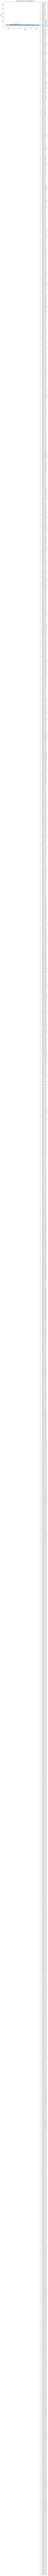

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Riduci le dimensioni a 2 componenti principali per la visualizzazione
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crea un DataFrame per i dati trasformati e i cluster
df_viz = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_viz['Cluster'] = df['dbscan_cluster']

# Visualizza i cluster
plt.figure(figsize=(10, 6))
for cluster in df_viz['Cluster'].unique():
    subset = df_viz[df_viz['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('DBSCAN Clusters (Visualized with PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
